# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

from functions import cleaning 

In [2]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

# Loading dataset

In [3]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

# Loading datasets
df_clients = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df3 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df2, df3], axis=0, ignore_index=True)

# Data cleaning

In [4]:
df_clients, df_trace, df_roster, df_clients_with_na = cleaning(df_clients, df_trace, df_roster)

# EDA

# Clients' profile

In [5]:
# According to the inital exploration, I will consider the numerical columns as numerical (for an analysis that will follow)
# and the others as categorical

# Creating a dataframe with categorical values
df_clients_ctgr = df_clients.select_dtypes("object")
# And creating a dataframe with numerical values
df_clients_nmr = df_clients.select_dtypes("number")

In [6]:
# Looking at main characteristics of clients

#### Univariate analysis

#### Clients' age

In [7]:
df_clients['clnt_age'].describe()

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

In [8]:
print(df_clients['clnt_age'].var())
print(df_clients['clnt_age'].mode()[0])
print(df_clients['clnt_age'].max() - df_clients['clnt_age'].min()) # range

243.0877811418307
58.5
82.5


<Axes: xlabel='clnt_age', ylabel='Count'>

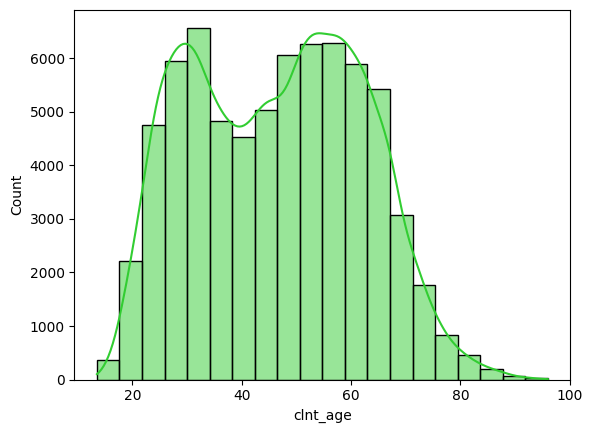

In [9]:
# "Spectral" sns.histplot(df['SalePrice'], kde=True, bins=30, color="salmon")
sns.histplot(df_clients['clnt_age'], kde=True, bins=20, color='limegreen')

<Axes: ylabel='clnt_age'>

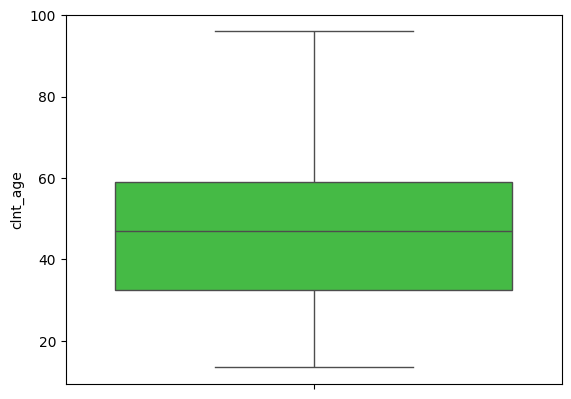

In [10]:
sns.boxplot(data=df_clients['clnt_age'], color='limegreen')

We observe from the boxplot that the clients' age doesn't have outliers.

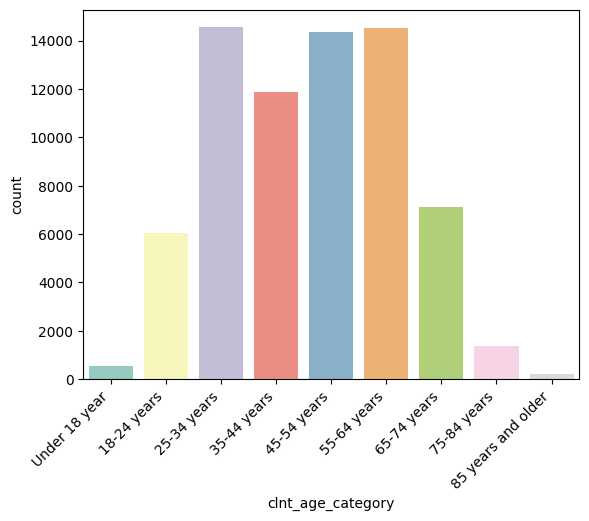

In [11]:
# I want to check the above with some age brackets
bins = [0, 18.0, 25.0, 35.0, 45.0, 55.0, 65.0 , 75.0, 85.0, df_clients['clnt_age'].max()]
labels = ['Under 18 year', '18-24 years', '25-34 years', '35-44 years', '45-54 years', 
          '55-64 years', '65-74 years', '75-84 years', '85 years and older']

df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


# Making a seaborn countplot
sns.countplot(data=df_clients, x='clnt_age_category', palette='Set3', hue='clnt_age_category', legend=False)
plt.xticks(rotation=45, ha='right')
plt.show()

It's notable that the clients predominantly fall into two age groups: 25-34 years and 45-64 years. Moreover, the interquartile range (IQR) reinforces this observation, spanning from 32 to 59 years, indicating that the majority of clients are concentrated within this age range.

#### Clients' tenure years

In [12]:
df_clients['clnt_tenure_yr'].describe()

count    70595.000000
mean        12.052950
std          6.871819
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64

In [13]:
print(df_clients['clnt_tenure_yr'].var())
print(df_clients['clnt_tenure_yr'].mode()[0])
print(df_clients['clnt_tenure_yr'].max() - df_clients['clnt_age'].min()) # range

47.221889582372256
6
48.5


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

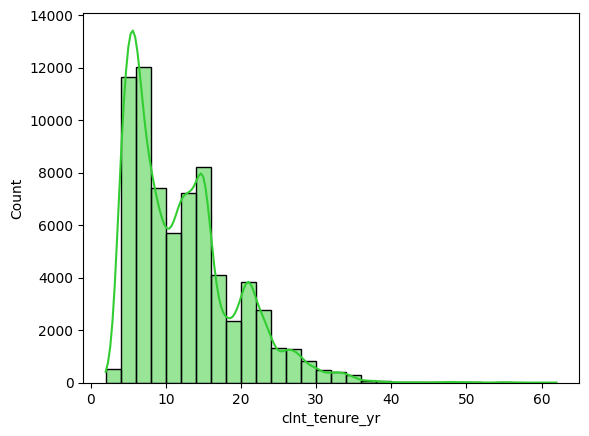

In [14]:
sns.histplot(df_clients['clnt_tenure_yr'], kde=True, bins=30, color='limegreen')

<Axes: ylabel='clnt_tenure_yr'>

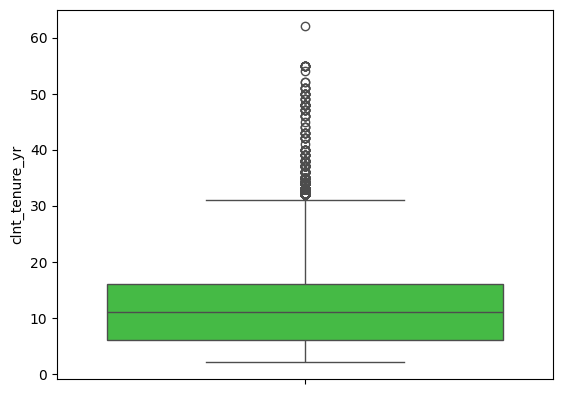

In [15]:
sns.boxplot(data=df_clients['clnt_tenure_yr'], color='limegreen')

The distribution of client tenure years is right skewed, and appears to have outliers with higher values. Although outliers are present, in the analysis they will be considered normal, since in the context of an investment management company there can be as long-term clients. The majority of clients have tenures ranging from approximately 6 to 16 years, as indicated by the interquartile range (IQR).

#### Client's gender

In [16]:
df_clients.gendr.value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

<Axes: xlabel='gendr', ylabel='count'>

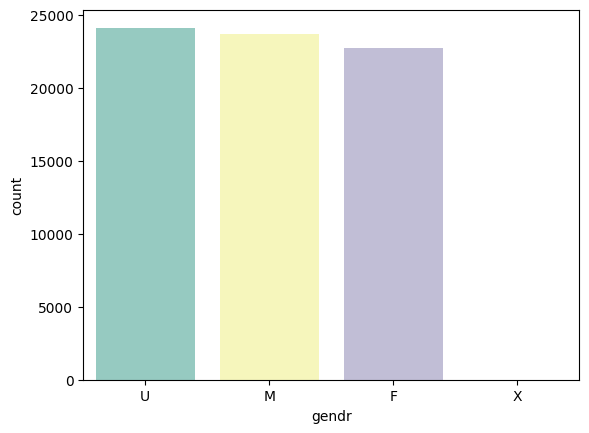

In [17]:
sns.countplot(data=df_clients, x='gendr', palette='Set3', hue='gendr', legend=False)

Based on the available data, excluding the unknown gender entries (including "U" and "X"), there appears to be a relatively balanced distribution between male and female clients.

#### Client's account balance

In [18]:
df_clients.bal.describe().apply(lambda x: f"{x:,.0f}")

count        70,595
mean        147,445
std         301,509
min          13,789
25%          37,347
50%          63,333
75%         137,545
max      16,320,040
Name: bal, dtype: object

In [19]:
df_clients.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'clnt_age_category'],
      dtype='object')

#### Interaction with company via call/ platform visit

<Axes: xlabel='calls_6_mnth', ylabel='count'>

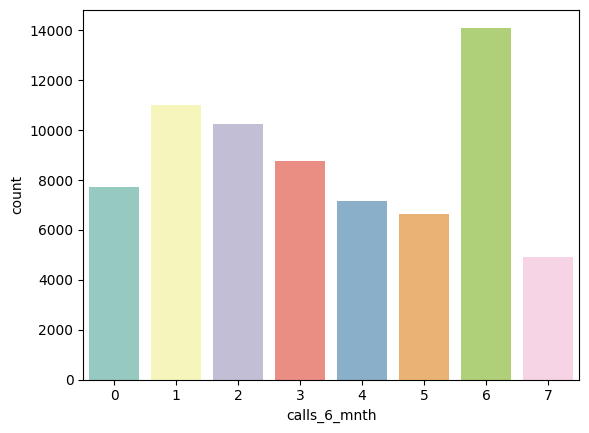

In [20]:
sns.countplot(data=df_clients, x='calls_6_mnth', palette='Set3', hue='calls_6_mnth', legend=False)

<Axes: xlabel='logons_6_mnth', ylabel='count'>

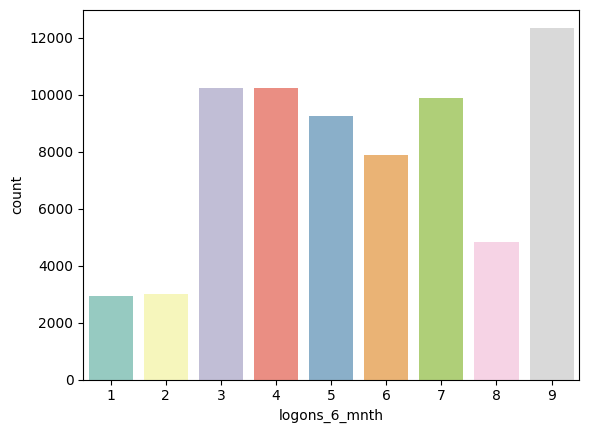

In [21]:
sns.countplot(data=df_clients, x='logons_6_mnth', palette='Set3', hue='logons_6_mnth', legend=False)

In [22]:
df_clients.logons_6_mnth.value_counts(normalize=True)*100

logons_6_mnth
9    17.494157
3    14.509526
4    14.476946
7    14.013740
5    13.108577
6    11.159431
8     6.813514
2     4.262342
1     4.161768
Name: proportion, dtype: float64

In [23]:
df_clients.logons_6_mnth.describe()

count    70595.000000
mean         5.566740
std          2.353286
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

The vast majority of the clients had some interaction with the company via call or platform visit the last 6 months.

#### Bivarate analysis

In [24]:
# Numerical variables, correlation heatmap

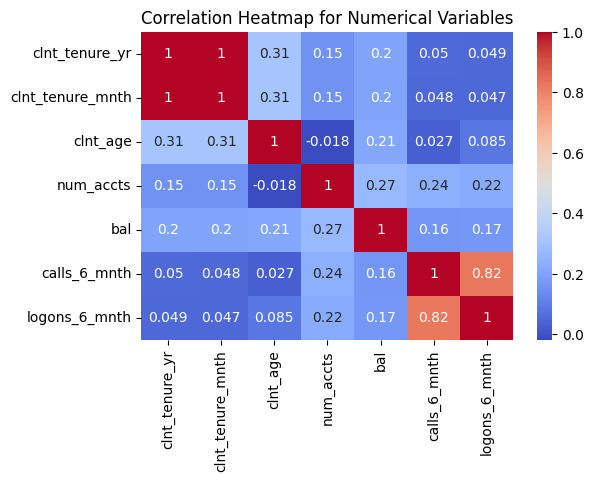

In [25]:
correlation_matrix = df_clients_nmr.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

With the Pearson correlation analysis, it appears that the most notable linear relationship exists between the number of logins to the site and the number of calls made by the customer within the last 6 months. 

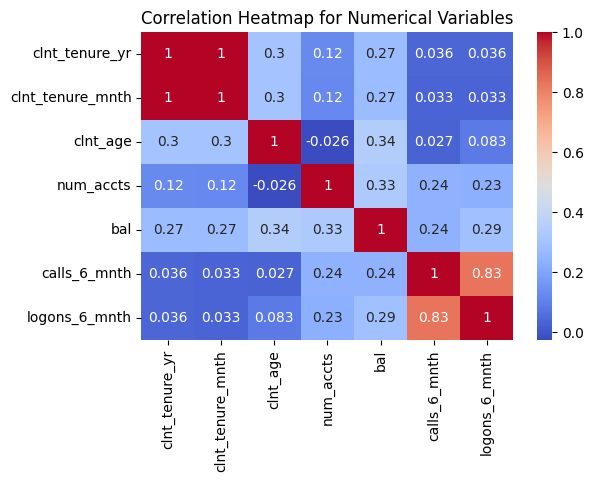

In [26]:
correlation_matrix_s = df_clients_nmr.corr(method='spearman')

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_s, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

The Spearman correlation analysis similarly indicates that the strongest association is observed between the number of logins and the number of calls made by customers in the last 6 months, and doesn't reveal any other strong correlation.

# Sample test, to find average time between successful steps

In [27]:
'''
So, for a 90% confidence level and a margin of error of ±5% : sample size of approximately 271
'''

'\nSo, for a 90% confidence level and a margin of error of ±5% : sample size of approximately 271\n'

In [28]:
# Specify the number of users you want to select for sample testing
num_users_to_select = 271
# Select a random sample of users from the DataFrame
sample_users = df_clients['client_id'].sample(n=num_users_to_select, random_state=42)  # Adjust random_state for reproducibility

In [29]:
# Filter the DataFrame to include only the selected users
sample_df = df_trace[df_trace['client_id'].isin(sample_users)]

# Replacing step names, with numerical names
sample_df['process_step'] = sample_df['process_step'].map({'start':1,'step_1':2,'step_2':3,'step_3':4,'confirm':5})

sample_df.sort_values(by=['client_id','date_time'], ascending=False, inplace=True)
sample_df = sample_df.reset_index(drop=True)

In [30]:
# Adding a new column with the following client for comparison purposes
sample_df['previous_client_id'] = sample_df['client_id'].shift(-1, fill_value=0)

In [31]:
# Dropping the columns that are not needed for the scope of this sample analysis
sample_df.drop(columns=['visitor_id','visit_id'], inplace=True)

In [32]:
# Adding two new columsn that I will use for comparison
sample_df['previous_process_step'] = -1
sample_df['previous_date_time'] = '1970-01-01 00:00:00'

In [33]:
len_df = sample_df.shape[0]

for i in range(len_df):
    if sample_df.loc[i,'client_id'] == sample_df.loc[i,'previous_client_id']:
        sample_df.loc[i,'previous_process_step'] = sample_df.loc[i+1,'process_step']
        sample_df.loc[i,'previous_date_time'] = sample_df.loc[i+1,'date_time']

In [34]:
sample_df['date_time'] = pd.to_datetime(sample_df['date_time'],format='%Y-%m-%d %H:%M:%S')
sample_df['previous_date_time'] = pd.to_datetime(sample_df['previous_date_time'],format='%Y-%m-%d %H:%M:%S')

In [35]:
# Adding a new layer, to filter the interactions that moved to the next step, had result 1
sample_df['subtracting_step'] = sample_df['process_step'] - sample_df['previous_process_step']

# Adding a new layer, to find the time between successful steps, and filter out the ones with no useful info
sample_df['subtracting_date_time'] = sample_df['date_time'] - sample_df['previous_date_time']

In [36]:
# Filtering the sample, to the interactions that moved one step forward == 1
# and excluding the ones that had substraction with the placeholder date '1970-01-01 00:00:00' < 10000 days
filtered_sample_df = sample_df[(sample_df['subtracting_step'] == 1) & (sample_df['subtracting_date_time'] < '10000 days 00:00:00')]

In [37]:
filtered_sample_df['subtracting_date_time'].describe()

count                         1005
mean     0 days 00:02:16.179104477
std      0 days 00:28:24.178010360
min                0 days 00:00:01
25%                0 days 00:00:13
50%                0 days 00:00:34
75%                0 days 00:01:16
max                0 days 13:16:42
Name: subtracting_date_time, dtype: object

In [38]:
filtered_sample_df['subtracting_date_time'].quantile(0.95) #  3 minutes at the 95% percentile

Timedelta('0 days 00:03:35.399999999')

In [39]:
IQR = filtered_sample_df['subtracting_date_time'].quantile(0.75) - filtered_sample_df['subtracting_date_time'].quantile(0.25)
upper_limit_for_outliers = filtered_sample_df['subtracting_date_time'].quantile(0.75) + IQR
upper_limit_for_outliers # with the IQR method

Timedelta('0 days 00:02:19')

In [40]:
filtered_sample_df['subtracting_date_time'].mean() + filtered_sample_df['subtracting_date_time'].std()*3
# outliers with the Standard Deviation method

Timedelta('0 days 01:27:28.713135557')

By this sample analysis, it appears that the average duration for a step forward in the online interaction is approximately 2 minutes, with the majority of the observations(95% percentile) within a range of around 3,5 minutes. To identify outliers, I utilized statistical methods, opting for the Interquartile Range (IQR) method, which indicates that anything exceeding 2 minutes and 19 seconds should be considered an outlier.  
I will incorporate the identified duration, with an added margin, to distinguish between sessions in digital footstep analysis. Considering typical intervals between steps of 1-2 minutes will help determine continuity within sessions versus potential new sessions.

# Digital footprints

### Two dataframes for 'test' and 'control' group

In [41]:
# Creating two dataframes for the two groups of the test
df_roster_test = df_roster[df_roster.variation == 'Test']
df_roster_control = df_roster[df_roster.variation == 'Control']


# Filtering 
df_test = df_trace[df_trace.client_id.isin(df_roster_test.client_id.unique().tolist())]
df_control = df_trace[df_trace.client_id.isin(df_roster_control.client_id.unique().tolist())]


# Rename column for brevity
df_test = df_test.rename(columns={'process_step': 'step'})
df_control = df_control.rename(columns={'process_step': 'step'})


# Replacing the step names with numbers for analysis purposes, will do subtraction later
df_test['step']  = df_test['step'] .map({'start':1,'step_1':2,'step_2':3,'step_3':4,'confirm':5})
df_control['step']  = df_control['step'] .map({'start':1,'step_1':2,'step_2':3,'step_3':4,'confirm':5})


# Sorting dataframes
df_test.sort_values(by=['client_id','date_time'], ascending=False, inplace=True)
df_control.sort_values(by=['client_id','date_time'], ascending=False, inplace=True)


# Dropping the columns that are not needed for the scope of this sample analysis
df_test.drop(columns=['visitor_id','visit_id'], inplace=True)
df_control.drop(columns=['visitor_id','visit_id'], inplace=True)


# Resetting index
df_test = df_test.reset_index(drop=True)
df_control = df_control.reset_index(drop=True)

### New columns for analysis

In [42]:
# Adding new columns that I will use for comparison: previous  and next client_id
df_test['prev_id'] = df_test['client_id'].shift(-1, fill_value=0)
df_control['prev_id'] = df_control['client_id'].shift(-1, fill_value=0)

df_test['next_id'] = df_test['client_id'].shift(1, fill_value=0)
df_control['next_id'] = df_control['client_id'].shift(1, fill_value=0)


# Adding new columns that I will use for comparison: previous and next step
df_test['prev_step'] = df_test['step'].shift(-1, fill_value=0)
df_control['prev_step'] = df_control['step'].shift(-1, fill_value=0)

df_test['next_step'] = df_test['step'].shift(1, fill_value=0)
df_control['next_step'] = df_control['step'].shift(1, fill_value=0)


# Adding new columns that I will use for comparison: previous datetime, next datetime
df_test['prev_time'] = df_test['date_time'].shift(-1, fill_value='1970-01-01 00:00:00')
df_control['prev_time'] = df_control['date_time'].shift(-1, fill_value='1970-01-01 00:00:00')

df_test['prev_time'] = pd.to_datetime(df_test['prev_time'],format='%Y-%m-%d %H:%M:%S')
df_control['prev_time'] = pd.to_datetime(df_control['prev_time'],format='%Y-%m-%d %H:%M:%S')

df_test['next_time'] = df_test['date_time'].shift(1, fill_value='1970-01-01 00:00:00')
df_control['next_time'] = df_control['date_time'].shift(1, fill_value='1970-01-01 00:00:00')

df_test['next_time'] = pd.to_datetime(df_test['next_time'],format='%Y-%m-%d %H:%M:%S')
df_control['next_time'] = pd.to_datetime(df_control['next_time'],format='%Y-%m-%d %H:%M:%S')


# Adding new columns that I will use for comparison: time difference between current and last step
df_test['time_diff_prev'] = df_test['date_time'] - df_test['prev_time']
df_control['time_diff_prev'] = df_control['date_time'] - df_control['prev_time']


# Adding new columns that I will use for comparison: step duration (difference of following datime with current one)
df_test['time_diff_next'] = df_test['next_time'] - df_test['date_time']
df_control['time_diff_next'] = df_control['next_time'] - df_control['date_time']


# Adding a new layer, to count the steps back, but making sure that I don't compare different clients
df_test['subtract_step'] = np.where(df_test['client_id'] == df_test['prev_id'], 
                                          (df_test['step'] - df_test['prev_step']),0)
df_control['subtract_step'] = np.where(df_control['client_id'] == df_control['prev_id'], 
                                          (df_control['step'] - df_control['prev_step']),0)

### Defining seperate sessions

Conditions:

The conditions aim to identify the start of a new session within a sequence of actions. If the current action is the first step ('start') and either the previous client is different or the time gap between the current and previous step exceeds the threshold of 6 minutes and 2 seconds, it signifies the start of a new session. Additionally, if the next action is also the first step ('start') and it's for the same client, but within the threshold from the current step, the conditions ensure that only the last of consecutive 'start' actions is considered the start of a new session, disregarding earlier consecutive 'start' actions for the same client within that time frame.

Note: The threshold of 6 minutes and 2 seconds is derived from thesample analysis of the time between steps, completed above in the document. Using the standard deviation method (multiplying by 3), it was determined that anything above 6 minutes and 2 seconds could be considered an outlier. This threshold helps identify significant time gaps between steps indicative of a new session.

In [43]:
# Adding new columns that I will use for comparison: counting the new sessions

df_test['new_session'] = False
df_control['new_session'] = False


# Threshold of 6 min and 2 seconds, result of the sample analysis
threshold_6m = datetime.timedelta(seconds=362) # to be adjusted if needed

conditions = np.array(
    (df_test['step'] == 1) & 
    ((df_test['time_diff_prev'] > threshold_6m) |
    (df_test['client_id'] != df_test['prev_id']))
)
df_test.loc[conditions, 'new_session'] = True


# Doing the same for the 'control' dataframe

conditions = np.array(
    (df_control['step'] == 1) & 
    ((df_control['time_diff_prev'] > threshold_6m) |
    (df_control['client_id'] != df_control['prev_id']))
)
df_control.loc[conditions, 'new_session'] = True


# Sorting everything to ascending order, to help with following steps

df_test.sort_values(by=['client_id','date_time'], ascending=True, inplace=True)
df_control.sort_values(by=['client_id','date_time'], ascending=True, inplace=True)

In [44]:
# Defining seperate sessions

count = 0  # Initialize count outside the function

def session_id(new_session):
    ''' Function to define the seperate sessions'''
    
    global count  # Access the count variable from outside the function
    
    if new_session == True:
        count += 1
        return count       
    else:
        return count


# Calling session_id that is defined in functions.py
df_test['session_id'] = df_test['new_session'].apply(session_id)


# Doing the same for the 'control' dataframe
count = 0  # Resetting count outside the function

df_control['session_id'] = df_control['new_session'].apply(session_id)

###  Filtering invalid sessions

Conditions

Valid Session:
A valid session is characterized by consecutive steps occurring within a duration of no more than 6 minutes.

Invalid Session:
An invalid session is identified when the time interval between consecutive steps exceeds 6 minutes.

Successful Session:
A successful session is a valid session that successfully reaches the 'confirm' stage after traversing all required steps ('start', 'step1', 'step2', 'step3'). In cases of multiple 'confirm' steps, the last one is regarded as the official confirm. Metrics for successful sessions include quantifying the total number of steps taken, the total number of steps taken backward, and calculating the duration from the session start to the final valid confirm step.

Unsuccessful Session:
Unsuccessful session is one that fails to reach the 'confirm' stage completely or reaches 'confirm' without passing through the necessary steps. These sessions may be flagged for further investigation to understand the reasons behind the incomplete or irregular user behavior.

In [45]:
# Variable to count steps until 'confirm'
steps_count = 1
# Variable to count how many steps back there were per session
steps_back = 0
# Variable to count how many valid 'confirms' have been per session
confirm_count = 0
# Variable to check if there are more than 1 'confirm' in the same session
confirmed = False
# Variable to check if the session is valid
valid = True
# Variables to see if per session steps 1,2,3 were completed before 'confirm'
check_1 = False
check_2 = False
check_3 = False
# Variable to measure how long a session that reached 'confirm' lasted
session_dur = '1970-01-01 00:00:00'


def session_info(df):
    # To access the variable from outside the function
    global steps_count 
    global steps_back
    global confirm_count
    global confirmed
    global valid
    global check_1
    global check_2
    global check_3
    global session_dur

    threshold_6m = datetime.timedelta(seconds=362)
    
    if df['new_session'] == True:
        # Resetting the counts for the new sessions
        steps_count = 1
        steps_back = 0
        #confirm_count = 0
        confirmed = False
        valid = True
        session_dur = df['date_time']
        session_dur = pd.to_datetime(session_dur,format='%Y-%m-%d %H:%M:%S')
        check_1 = False
        check_2 = False
        checl_3 = False        
        return None

    elif df['time_diff_prev'] < threshold_6m and valid:
        
        if df['step'] in (1,2,3,4):
            if df['step'] == 2:
                check_1 = True
            elif df['step'] == 3:
                check_2 = True
            else:
                check_3 = True
                
            # Counting the steps back
            if df['subtract_step'] < 0:
                steps_back += abs(df['subtract_step'])            
            
            # Counting the total steps
            steps_count += 1
            return None
 
        # At the first 'confirm' I am returning the total number of steps
        elif df['step'] == 5 and not confirmed and check_1 and check_2 and check_3:
            confirm_count = 1
            confirmed = True
            session_dur = df['date_time'] - session_dur
            return [confirm_count, steps_count, steps_back, session_dur, valid]
        
        # When more than one 'confirm' happens, I need to return the updated info, and add a step count for the first 'confirm'
        elif df['step'] == 5 and confirmed and check_1 and check_2 and check_3:
            confirm_count += 1
            session_dur = df['date_time'] - session_dur
            steps_count += 1
            return [confirm_count, steps_count, steps_back, session_dur, valid]
    
        # Checking the case where'confirm' is reached without passing from all the necessary steps
        elif df['step'] == 5 and not confirmed:
            # I am considering it a valid session but not a successful one
            # I will count it as an extra step, but that can be defined better later
            steps_count += 1
            return None
    
    elif df['time_diff_prev'] > threshold_6m and valid:
        valid = False
        return [confirm_count, steps_count, steps_back, session_dur, valid]

    else:
        # this is the case where valid is already False
        return [confirm_count, steps_count, steps_back, session_dur, valid]

In [46]:
df_test['session_info'] = df_test.apply(session_info, axis=1)
df_control['session_info'] = df_control.apply(session_info, axis=1)

In [47]:
# Dropping columns that will not be needed further
df_test_fltrd = df_test.drop(columns=(['time_diff_prev','subtract_step','new_session',
                       'prev_id','next_id','prev_step','next_step','prev_time','next_time']))
df_control_fltrd = df_test.drop(columns=(['time_diff_prev','subtract_step','new_session',
                       'prev_id','next_id','prev_step','next_step','prev_time','next_time']))

In [48]:
df_test_fltrd.head(40)

,client_id,step,date_time,time_diff_next,session_id,session_info
176698,1001101,1,2017-04-05 16:55:20,0 days 00:00:13,1,None
176697,1001101,2,2017-04-05 16:55:33,0 days 00:00:29,1,None
176696,1001101,3,2017-04-05 16:56:02,0 days 00:00:32,1,None
176695,1001101,2,2017-04-05 16:56:34,0 days 00:00:26,1,None
176694,1001101,3,2017-04-05 16:57:00,0 days 00:00:20,1,None
176693,1001101,2,2017-04-05 16:57:20,0 days 00:00:32,1,None
176692,1001101,3,2017-04-05 16:57:52,0 days 00:03:32,1,None
176691,1001101,1,2017-04-05 17:01:24,15 days 22:13:59,1,None
176690,1001101,1,2017-04-21 15:15:23,0 days 00:00:07,2,None
176689,1001101,2,2017-04-21 15:15:30,0 days 00:00:27,2,None


# Notes etc

In [58]:
df_test_fltrd.groupby('session_id')['valid'].value_counts()

session_id  valid                          
1           valid                              8
2           valid                              4
            confirmed,4,0,-1 days +23:55:38    1
            invalid                            1
3           valid                              5
                                              ..
32804       valid                              2
32805       valid                              4
32806       valid                              4
            confirmed,4,0,-1 days +23:58:45    1
32807       valid                              2
Name: count, Length: 54970, dtype: int64

In [ ]:
'''
IN PROGRESS
'''

In [ ]:
# Mean of step duration

In [96]:
df_test_sess.loc[~(df_test_sess['step_time'] == '0 days 00:00:00'), 'step_time'].mean()

Timedelta('0 days 00:01:21.530133184')

In [97]:
df_control_sess.loc[~(df_control_sess['step_time'] == '0 days 00:00:00'), 'step_time'].mean()

Timedelta('0 days 00:01:25.650434588')

In [ ]:
'''
IN PROGRESS
'''